## Regresion Logistica 
*Jonathan Andres Pardo*  

Se busca predecir si una persona puede tener diabetes en relacion a datos medicos

**Metricas DataSet**

**Se Realiza la importacion de librerias necesarias para realizar la regresion linear**

* * *

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


**Leemos los datos del archivo CSV Diabetes2.csv en un DataFrame de pandas tomado de https://www.kaggle.com/datasets/kandij/diabetes-dataset**

* * *

In [120]:
hr_dataset=pd.read_csv("RegresionLogistica/diabetes2.csv")

**Muestra de los encabezados del dataset**
* * *

In [121]:
hr_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Ver tipos de datos existentes en las columnas verificando nulas**
* * *

In [122]:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 **Analizamos la distribucion de los datos en las variables numericas**
* * * 

In [123]:
hr_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 **Determinar si es nulo el dataset y realizar limpieza de esos datos nulos**
* * * 

In [124]:
hr_dataset.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [125]:
hr_dataset = hr_dataset.fillna(hr_dataset.mean())


In [126]:
hr_dataset.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [127]:
print("Numero de  0's para Glucose:", hr_dataset['Glucose'].isin([0]).sum())
print("Numero de  0's para Blood Pressure:", hr_dataset['BloodPressure'].isin([0]).sum())
print("Numero de  0's para Skin Thickness:", hr_dataset['SkinThickness'].isin([0]).sum())
print("Numero de  0's para Insulin:", hr_dataset['Insulin'].isin([0]).sum())
print("Numero de  0's para BMI:", hr_dataset['BMI'].isin([0]).sum())

Numero de  0's para Glucose: 5
Numero de  0's para Blood Pressure: 35
Numero de  0's para Skin Thickness: 227
Numero de  0's para Insulin: 374
Numero de  0's para BMI: 11


In [128]:
glucose = hr_dataset['Glucose'].isin([0]).sum() / 768*100
print("Porcentaje de datos que faltan para Glocuse: %.2f" % glucose)

bloodpressure = hr_dataset['BloodPressure'].isin([0]).sum() / 768*100
print("Porcentaje de datos que faltan paraBlood Pressure: %.2f" % bloodpressure)

skinthickness = hr_dataset['SkinThickness'].isin([0]).sum() / 768*100,
print("Porcentaje de datos que faltan para Skin Thickness: %.2f" % skinthickness)

insulin =hr_dataset['Insulin'].isin([0]).sum() / 768*100
print("Porcentaje de datos que faltan para Insulin: %.2f" % insulin)

bmi = hr_dataset['BMI'].isin([0]).sum() / 768*100
print("Porcentaje de datos que faltan para BMI: %.2f" % bmi)

Porcentaje de datos que faltan para Glocuse: 0.65
Porcentaje de datos que faltan paraBlood Pressure: 4.56
Porcentaje de datos que faltan para Skin Thickness: 29.56
Porcentaje de datos que faltan para Insulin: 48.70
Porcentaje de datos que faltan para BMI: 1.43


Se limpia la data faltante de las variables

In [129]:
hr_dataset_clean = hr_dataset.copy()

In [130]:
hr_dataset_clean['Glucose'] = hr_dataset_clean['Glucose'].replace(0,hr_dataset['Glucose'].mean())
hr_dataset_clean['BloodPressure'] = hr_dataset_clean['BloodPressure'].replace(0,hr_dataset['BloodPressure'].mean())
hr_dataset_clean['SkinThickness'] = hr_dataset_clean['SkinThickness'].replace(0,hr_dataset['SkinThickness'].mean())
hr_dataset_clean['Insulin'] = hr_dataset_clean['Insulin'].replace(0,hr_dataset['Insulin'].mean())
hr_dataset_clean['BMI'] = hr_dataset_clean['BMI'].replace(0,hr_dataset['BMI'].mean())

Se normaliza la cantidad de embarazos dejandolo como 0 y 1 para solo determinar si estuvo en este estado

In [131]:
hr_dataset_clean['Pregnancies'].values[hr_dataset_clean['Pregnancies'] > 0] = 1

In [132]:
hr_dataset_clean.describe


<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              1    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              1    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763            1    101.0           76.0      48.000000  180.000000  32.9   
764            1    122.0           70.0      27.000000   79.799479  36.8   
765            1    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outco

In [133]:
hr_dataset_clean.columns
print(list(hr_dataset_clean.columns))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Calculo de correlacion entre las columnas excluyendo valores nulos 

In [134]:
hr_dataset_clean.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,-0.017816,-0.038159,-0.067654,-0.008117,-0.161757,-0.060780,0.197159,0.005705
Glucose,-0.017816,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,-0.038159,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,-0.067654,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.008117,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,-0.161757,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.060780,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.197159,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.005705,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


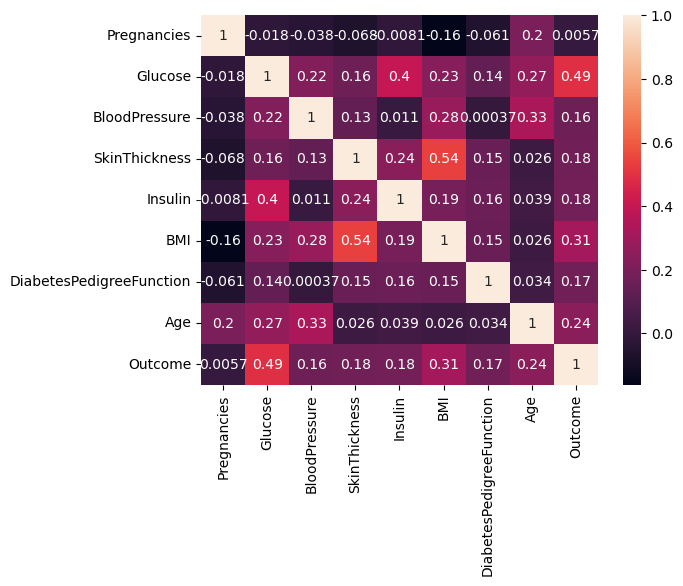

In [135]:
sns.heatmap(hr_dataset_clean.corr(), annot=True)
plt.show()

Se agrega visualizacion de la relacion entre variables donde se encuentra la correlacion entre Glucosa,IMC y edad como uno de los principales factores para tener diabetes


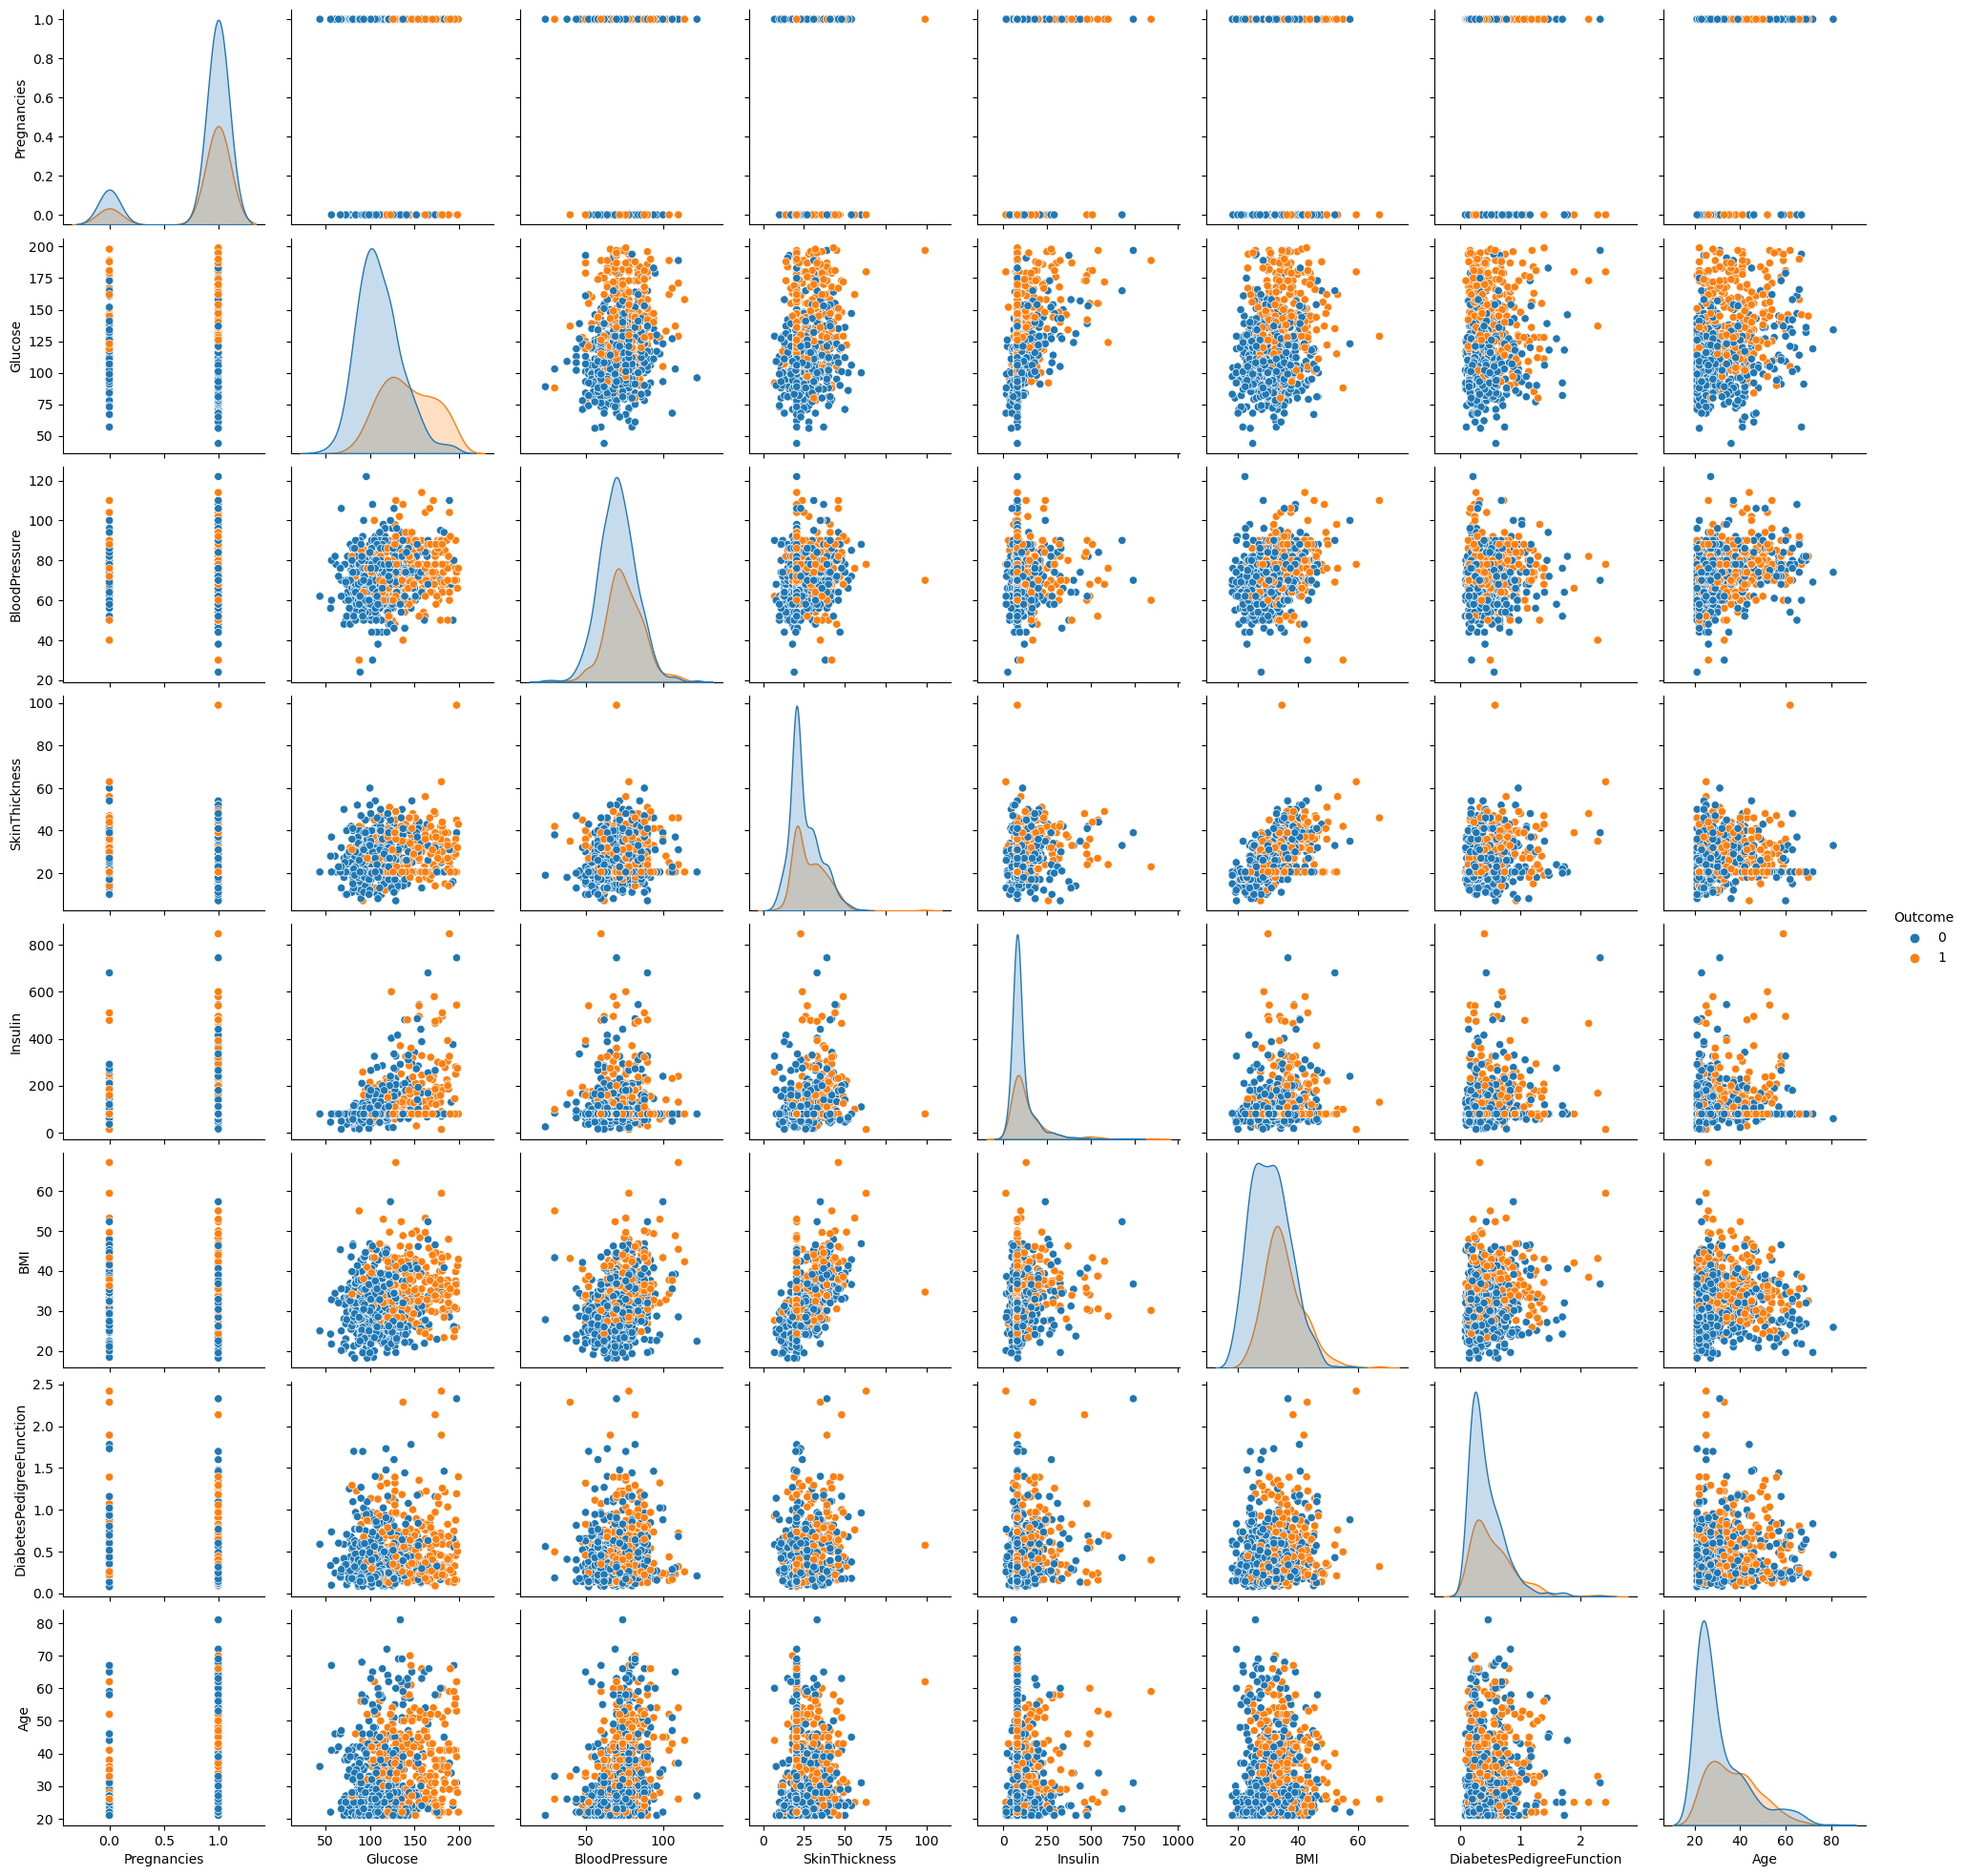

In [136]:
sns.pairplot(hr_dataset_clean, hue="Outcome")
plt.show()

Revision de variables de estudio Outcome (resultado) y Pregnancies(embarazos)

In [137]:
hr_dataset_clean['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [138]:
hr_dataset_clean['Pregnancies'].value_counts()

1    657
0    111
Name: Pregnancies, dtype: int64

**Se divide el conjunto de datos en 2 la data de entrenamiento  y la data de prueba en una relacion 80/20**
* * *

In [181]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(
    hr_dataset_clean.iloc[:, :-1], hr_dataset_clean.iloc[:, -1], test_size=0.2, random_state=30)

 **Creamos modelo de la regresión logistica**
* * *

In [182]:
modelo = LogisticRegression()

**Entrenamos el modelo**
* * *

In [183]:
modelo.fit(x_entrenamiento, y_entrenamiento)

LogisticRegression()

**Predecimos la ocurrencia de diabetes con el conjunto de prueba**
* * *

In [197]:
predicciones = modelo.predict(x_prueba)

Calculo de la precision del modelo

In [186]:
precision = modelo.score(x_prueba, y_prueba)
print(f"Precisión del modelo: {precision}")

Precisión del modelo: 0.8116883116883117


**Prueba si un paciente puede tener diabetes**

In [ ]:
Paciente normal

In [212]:

paciente = [[0,120,90,0.11,70,25,0.87,45]]
 #Embarazos,Glucosa,Presión arterial,Grosor de la piel,Insulina, IMC, Diabetes Función pedigrí, Edad
y_predicted = modelo.predict(paciente)
print("El paciente puede tener diabetes: ", y_predicted)



El paciente puede tener diabetes:  [0]


Paciente con todo disparado

In [201]:
paciente = [[0,280,150,2.9,180,27,0.87,32]]
 #Embarazos,Glucosa,Presión arterial,Grosor de la piel,Insulina, IMC, Diabetes Función pedigrí, Edad
y_predicted = modelo.predict(paciente)
print("El paciente puede tener diabetes: ", y_predicted)


El paciente puede tener diabetes:  [1]
